# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

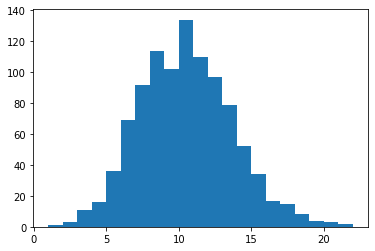

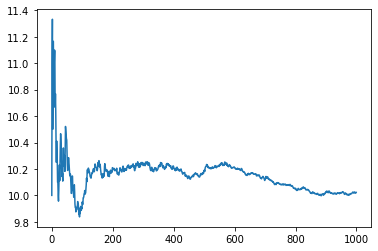

<function matplotlib.pyplot.show(*args, **kw)>

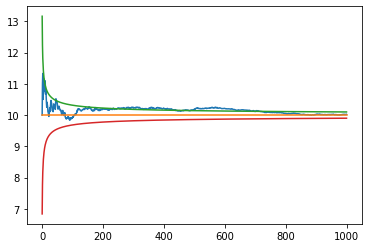

In [90]:
import numpy as np
import matplotlib.pyplot as plt


l = 10
N = 1000

s = np.random.poisson(10, 1000)
#Display histogram of the sample:

plt.hist(s, bins = range(1, max(s)))
plt.show()

sum = np.zeros(s.size, dtype=float)
for index in range (s.size):
    if index > 0:
        value = (sum[index - 1] * index + s[index]) / (index + 1)
    else:
        value = s[index]
    sum[index] = value.astype(float)

plt.plot(sum)
plt.show()

Xbar = np.cumsum(s)/np.arange(1,N+1)
plt.plot(Xbar)


hor = np.full(N, l)
plt.plot(hor)

sd = np.sqrt(hor/np.arange(1,N+1))
plt.plot(hor+sd)
plt.plot(hor-sd)

plt.show



**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

In [91]:
#Argue that these formulas indeed describe a discrete distribution.

# We can prove by induction that (sum 1/(k*(k+1)*(k+2)), k=1 to n) = 1/4 - 1/(2 (n + 1) (n + 2)) so
# (sum 1/(|k|*(|k|+1)*(|k|+2)), k=-inf to inf) = 1/2


In [92]:
#Show that 𝐸𝑌=0, but 𝑌 has no variation (i.e. the defining series is not absolutely convergent).

# E(Y) = 0 because k and -k have the same probability mass

# If variance exists, then
# Var(Y) = E(Y^2)−(E(Y))^2, but E(Y) = 0, so Var(Y) = E(Y^2)
# E(Y^2) = 0^2*(1/2) + (sum 2*(k^2)*(1/(k*(k+1)*(k+2)), k=1 to inf) =
# = (sum (2 *k)/((k+1)*(k+2)), k=1 to infinity)
# By the comparison test, with (sum 1/k, k=1 to infinity) the series diverges.
# So 𝑌 has no variation.
                      

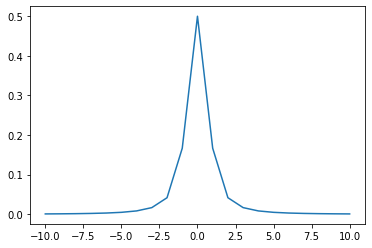

In [93]:
#Plot the function 𝑓(𝑘)=𝑃(𝑌=𝑘) for 𝑘∈[−10,10].
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random

def pmf(k):
    if k == 0:
        return 0.5
    return 1/(abs(k)*(abs(k)+1)*(abs(k)+2))


distribution_range = np.arange(-10, 11)

plt.plot(distribution_range, np.vectorize(pmf)(distribution_range))
plt.show()



In [94]:
#Write a function that samples from 𝑌's distribution.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random


def sample():
    # P(Y = 0) = 1/2
    if np.random.randint(2) == 0:
        return 0
        
    # P(Y = k) = P(Y = -k)
    if np.random.randint(2) == 0:
        is_positive = True
    else:
        is_positive = False
        
    random = np.random.random()
    Y = 1
    
    #(sum 1/(k*(k+1)*(k+2)), k=1 to n) = 1/4 - 1/(2 (n + 1) (n + 2))
    probability_sum = 1 - 2/((Y + 1) * (Y + 2))
    
    while random > probability_sum:
        Y *= 2
        probability_sum = 1 - 2/((Y + 1) * (Y + 2))
        
    left_Y = Y // 2
    right_Y = Y
    
    while left_Y != right_Y:
        middle_Y = (left_Y + right_Y) // 2
        
        if 1 - 2/((middle_Y + 1) * (middle_Y + 2)) > random:
            right_Y = middle_Y
        else:
            left_Y = middle_Y + 1
            

    if is_positive:
        return left_Y
    else:
        return left_Y * (-1)
    


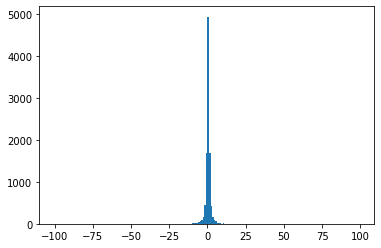

In [95]:
#Generate 𝑁=10000 values 𝑦1,…,𝑦𝑛 from the distribution.

N = 10000

def get_samples(sample_size):
    sample_array = np.zeros(sample_size, dtype=int)
    
    for index in range(sample_size):
        sample_array[index] = sample()

    return sample_array

distribution = get_samples(N)
plt.hist(distribution, bins = range(-100, 100))
plt.show()

 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?

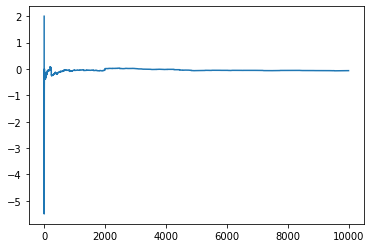

In [96]:
Xbar = np.cumsum(distribution)/np.arange(1,N+1)
plt.plot(Xbar)
plt.show()

 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.

[ 2.  -5.5  0.  ...  0.   0.   0. ]


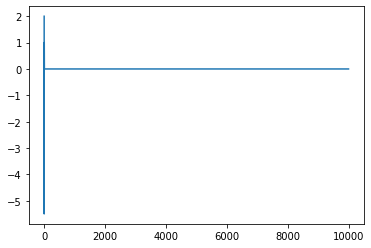

In [97]:
median_array = np.zeros(N)

for index in range(N):
    median_array[index] = np.median(distribution[:index + 1])

print(median_array)

plt.plot(median_array)
plt.show()
